In [63]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import re

In [64]:
dataset = pd.read_csv('./dataset/HzAGN_Groups_0_3noMcut_Infalltime/HzAGN_Groups_0_3_noMcut_InfallTime_matched.csv')

In [65]:
dataset[:5]

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
0,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,...,0.00785,254.1469,0.01259,198.174662,184.2864,135.84045,0,0.348211,1,9
1,3077,1,23,3554,-0.15756,-0.46617,0.99835,0.0,0.0,0.0,...,0.00785,284.0533,0.01259,198.174662,184.2864,135.84045,0,0.262511,1,9
2,3077,1,24,3560,-0.16319,-0.47106,0.99822,0.0,0.0,0.0,...,0.00785,208.1544,0.01259,198.174662,184.2864,135.84045,0,0.827232,1,9
3,3077,1,25,3561,-0.16792,-0.46637,0.99826,0.0,0.0,0.0,...,0.00785,265.0288,0.01259,198.174662,184.2864,135.84045,0,1.366920,1,9
4,3077,1,26,3793,-0.16778,-0.46684,0.99814,0.0,0.0,0.0,...,0.00785,222.6391,0.01259,198.174662,184.2864,135.84045,0,1.340197,1,9


In [125]:
dataset.columns.tolist()

['idgroup_1',
 'relax',
 'ID_1',
 'id[1]',
 'Ra[2]',
 'Dec[3]',
 'z[4]',
 'zphot[5]',
 'zphotup[6]',
 'zphotdown[7]',
 'logMsim[8]',
 'logMphot[9]',
 'logMphup[10]',
 'logMphdown[11]',
 'SFRsim[12]',
 'logSFRphot[13]',
 'logSFRup[14]',
 'logSFRdown[15]',
 'agegal[16]',
 'velgal[17]',
 'rank[18]',
 'ngal[19]',
 'idgroup_2',
 'idgroup[20]',
 'Ragroup[21]',
 'Decgroup[22]',
 'zgroup[23]',
 'Mvirgroup[24]',
 'Mtotgroup[25]',
 'Rvir_deg[26]',
 'vsig[27]',
 'Rmax_deg[28]',
 'ID_2',
 'id_ligthcone[col1]',
 't(Myr)[col2]',
 'z_lightcone[col3]',
 'z_0[col4]',
 'snap_0[col5]',
 'snapm_0[col6]',
 'idgal_0[col7]',
 'idhalo_0[col8]',
 'Mh_0[col9]',
 'M*_0[col10]',
 'posx_0[col11]',
 'posy_0[col12]',
 'posz_0[col13]',
 'poshx_0[col14]',
 'poshy_0[col15]',
 'poshz_0[col16]',
 'SFR_0[col17]',
 'Rvirh_0[col18]',
 'Rvirg_0[col19]',
 'z_first[col20]',
 'snapm_first[col21]',
 'idgal_first[col22]',
 'idhalo_first[col23]',
 'Mh_first[col24]',
 'M*_first[col25]',
 'posx_first[col26]',
 'posy_first[col27]',
 

Text(0, 0.5, 'Mh_0')

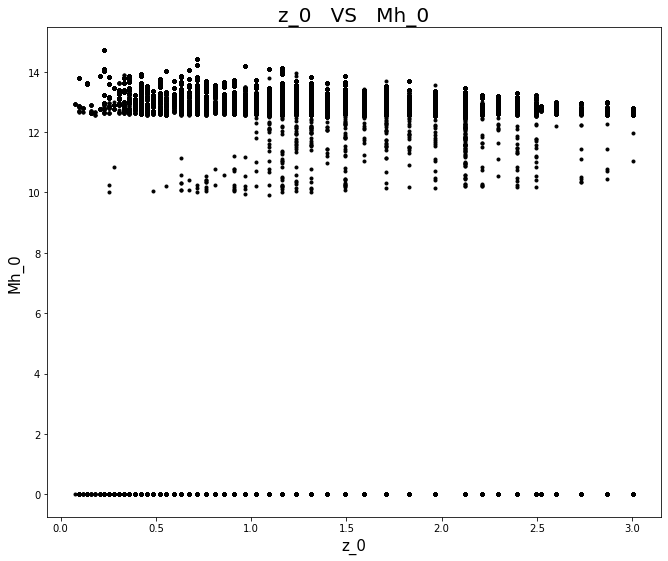

In [170]:
y = dataset['Mh_0[col9]']
x = dataset['z_0[col4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='black')
plt.title(str(x_label)+'   VS   '+str(y_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

(9.0, 15.0)

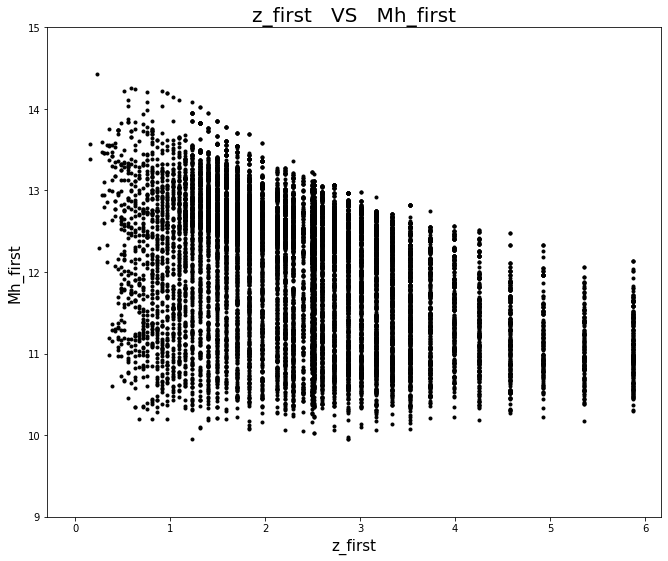

In [174]:

y = dataset['Mh_first[col24]']
x = dataset['z_first[col20]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title(str(x_label)+'   VS   '+str(y_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.ylim(9,15)

In [158]:
dataset['Mh_0[col9]'][20000], dataset['Mh_first[col24]'][20000], (dataset['Mh_0[col9]']-dataset['Mh_first[col24]'])[20000]

(13.1888, 12.19922, 0.9895800000000001)

Text(0, 0.5, 'Mh_0 - Mh_first')

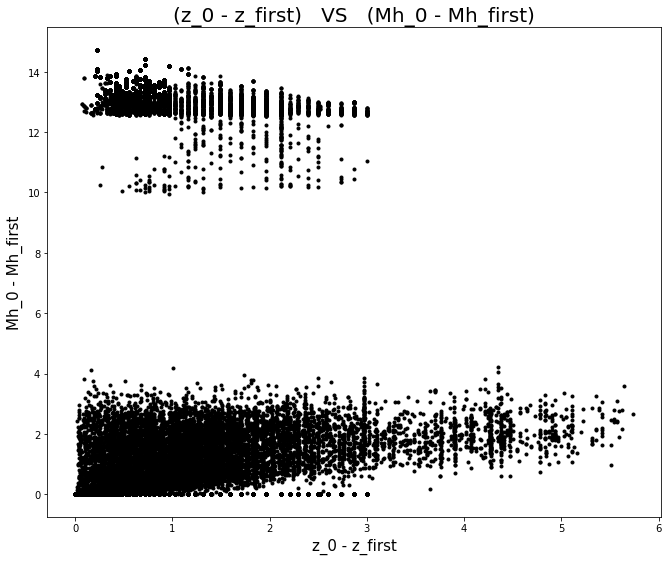

In [175]:
y1 = dataset['Mh_first[col24]']
y2 = dataset['Mh_0[col9]']
x1 = dataset['z_first[col20]']
x2 = dataset['z_0[col4]']

x = np.abs(x2-x1)
y = np.abs(y2-y1)

x_label = x2.name.split('[')[0] + ' - ' + x1.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title('(' + str(x_label)+')   VS   ('+ str(y_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

(0.0, 4.0)

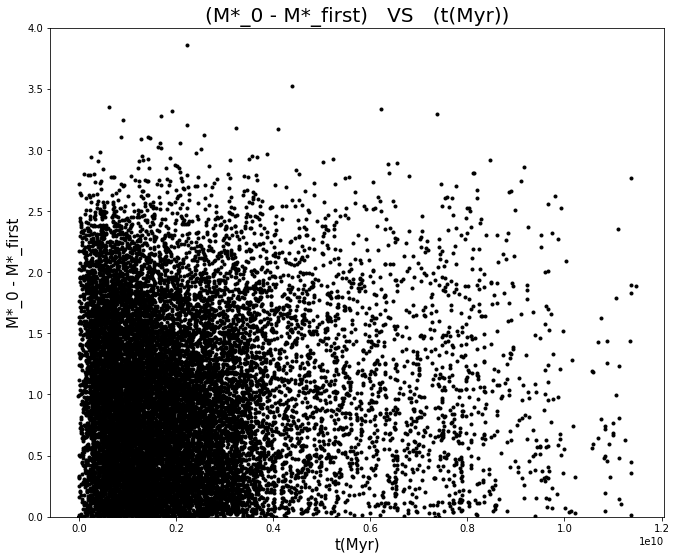

In [180]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x = dataset['t(Myr)[col2]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.ylim(0,4)

Text(0, 0.5, 'M*_0 - M*_first')

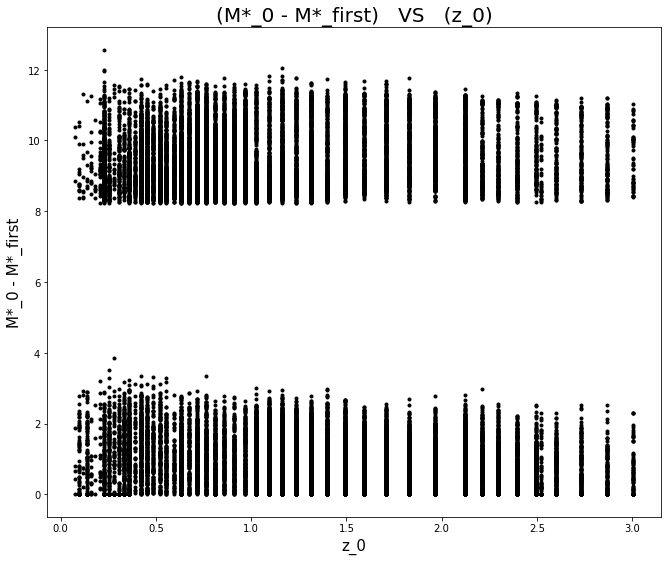

In [181]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x = dataset['z_0[col4]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'SFR_0 - SFR_first')

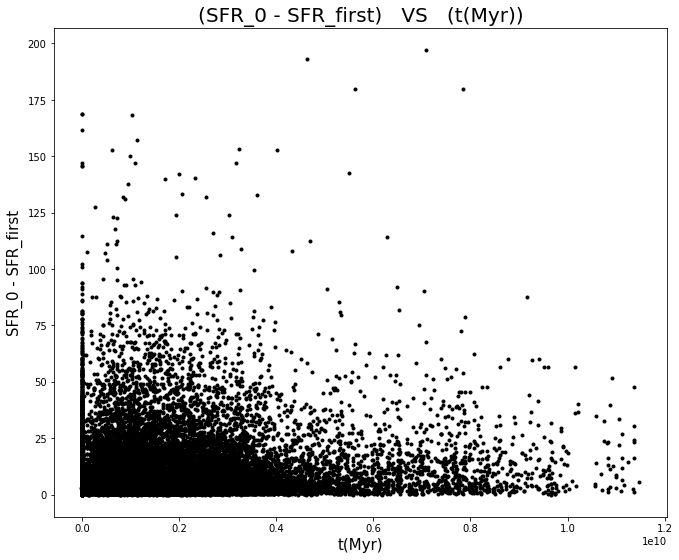

In [184]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['t(Myr)[col2]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

(8.0, 13.0)

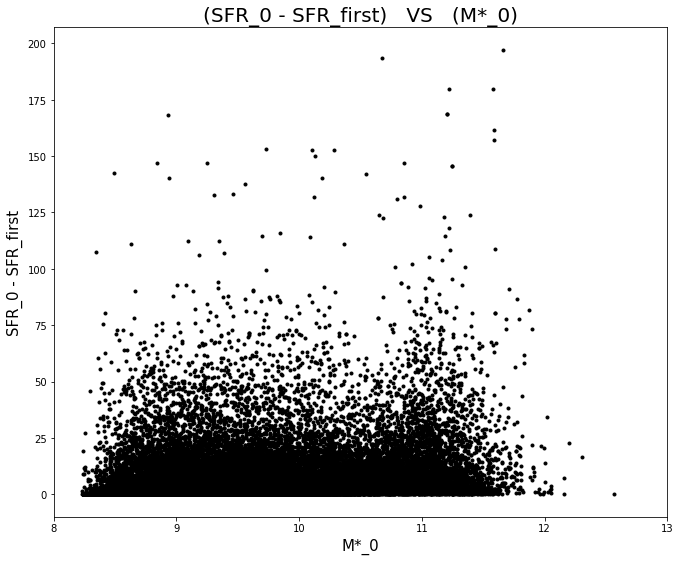

In [186]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['M*_0[col10]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.xlim(8,13)

Text(0, 0.5, 'SFR_0 - SFR_first')

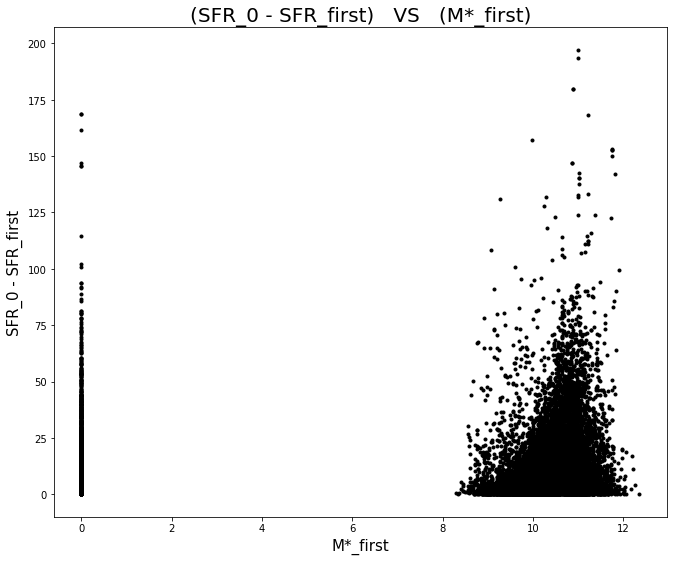

In [187]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['M*_first[col25]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)